In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [3]:
import sys
sys.path.append(r'C:\git\smartdata')
sys.path.append(path)
sys.path.append('C:\git\statslib')
import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData

In [4]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [5]:
from datetime import datetime, date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [6]:
from gmt.fom.gas.shared.utils.common import *
from gmt.fom.gas.shared.utils.dframe import *

In [7]:
from gmt.fom.gas.shared.models.stpb.data.mongo import MongoAdapter

In [8]:
figsize=(8*1.6, 8)

# Data

In [9]:
path = r'\\trading1\Common\gasmodels\short_term_power_burn\data\UK\dependent_var\gas_view__power_station_gas_demand.csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

Date  Value to Show
0  28/02/2021     -68.303601
1  27/02/2021     -65.235068
2  26/02/2021     -61.192432
3  25/02/2021     -52.171164
4  24/02/2021     -32.815729

In [12]:
df.columns = ['date', 'value']

In [13]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y').date())

In [14]:
t0 = date(2007,10,1)
df = df[df.set_index('date').index>t0]

In [15]:
df['value']= df['value'].mul(-1.0)

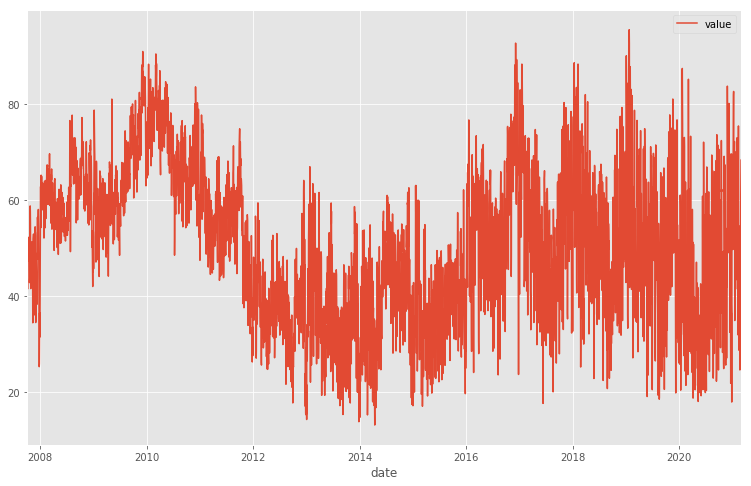

In [16]:
df.set_index('date').plot(figsize=(8*1.6, 8))

In [17]:
df.describe()

value
count  4899.000000
mean     51.202635
std      15.552366
min      13.162207
25%      38.979838
50%      51.656063
75%      62.777365
max      95.450664

## Putting into Mongo

In [18]:
myData = MongoAdapter()

myData.mongo.choose_db(myData.GAS_MODELS_DB)

2021-04-20 13:33:22,699: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.


In [19]:
collection = myData.STPB_GAS_VIEW_POWER_STATION_GAS_DEMAND
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [20]:
time.sleep(5) #<---we need time to clean MongoDB collections

myData.mongo.pandas_to_mongo(to_pd_todatetime(df, 'date'))

2021-04-20 13:33:32,063: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 100: DEBUG: Saving 4899 rows to MongoDb.


## Retrieving from Mongo

In [21]:
myData = MongoAdapter()
df = myData.load_stpb_gas_view_power_station_gas_demand()
df.shape

2021-04-20 13:33:38,703: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.
2021-04-20 13:33:39,045: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\models\stpb\stpb.py: 36: INFO: Retrieving....


(4899, 2)

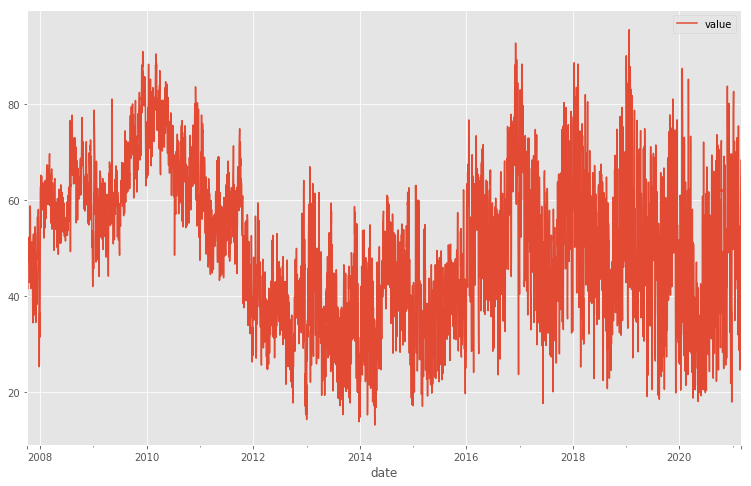

In [22]:
df.set_index('date').plot(figsize=figsize, label='')